In [7]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import sphere_difraction as sd

importlib.reload(sd)

<module 'sphere_difraction' from 'e:\\Archive\\MSU\\Магистратура\\Diplom\\Sphere difraction\\sphere_difraction.py'>

## Tasks descriptions

In [2]:
def FirstTest():
     lmbd = 2 * np.pi / 1000.0 # wave length
     k = 2 * np.pi / lmbd # wave number

     eps = [1, complex(1.1, 0.01), 2.5] # permittivities of layers
     eps.append(8.85e-12) # permittivity of vacuum (outer space)
     eps = np.array(eps)

     r = np.array([0.01, 
          0.01 + np.pi/k, 
          0.01 + np.pi/k + 0.5 /k]) # concentric spheres radiuses

     #r *= 10

     return r, eps, lmbd

In [30]:
def SimpleSphereTest():
    lmbd = 2 * np.pi / 1000.0 # wave length
    k = 2 * np.pi / lmbd # wave number

    eps = [1] # permittivities of layers
    eps.append(8.85e-12) # permittivity of vacuum (outer space)

    r = [0.01] # concentric spheres radiuses

    return r, eps, lmbd

In [31]:
def SecondTest():
     lmbd = 2 * np.pi / 1000.0 # wave length
     k = 2 * np.pi / lmbd # wave number

     eps = [1, 2.5, 0.25] # permittivities of layers
     eps.append(8.85e-12) # permittivity of vacuum (outer space)

     r = [0.01, 
          0.01 + np.pi/k,
          0.01 + np.pi/k * 2] # concentric spheres radiuses
     
     return r, eps, lmbd

In [32]:
def FourLayered():
    lmbd = 2 * np.pi / 1000.0 # wave length
    k = 2 * np.pi / lmbd # wave number

    eps = [1, 2.5, 0.25] # permittivities of layers
    eps.append(8.85e-12) # permittivity of vacuum (outer space)

    r = [0.9/4,
        0.9/3,
        0.9/2,
        0.9] # concentric spheres radiuses
    
    return r, eps, lmbd


### Helper functions

In [49]:
def plot_field_scaterring(array):
    y_values = [abs(c) for c in array][:]
    # Количество точек
    num_points = len(y_values)

    # Создаём массив углов (переводим в радианы)
    theta = np.linspace(0, 2 * np.pi, num_points)  # Углы в радианах

    # Создаём полярный график
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, projection='polar')

    # Строим график
    ax.plot(theta, y_values, linestyle='-')
    #ax.plot(theta, 10 * np.log10(y_values), linestyle='-')

    # Заголовок
    ax.set_title('Диаграмма рассеяния')

    plt.show()
    return plt

In [3]:
def plot_field_distribution(E, limits, r, eps, lmbd):
    y_min, y_max, x_min, x_max = limits

    plt.figure(figsize=(7, 6))
    plt.imshow(E, origin='lower', aspect='auto', cmap="viridis",extent=[y_min, y_max, x_min, x_max])
    plt.colorbar(label='Модуль E')
    plt.title("Распределение рассеянного электрического поля на проводящем шаре, покрытом слоями диэлектрика")
    plt.xlabel('Z')
    plt.ylabel('Y')
    
    info_text = f"λ = {lmbd:.5f}\n"
    for i, (radius, epsilon) in enumerate(zip(r, eps), start=1):
        if i == 1:
            continue
        info_text += f"Слой {i-1}: r = {radius:.5f}, ε = {epsilon}\n"

    # Добавляем текст на график
    plt.text(0.05, 0.12, info_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='center', bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8))
    
    plt.tight_layout()
    plt.show()

## First Test

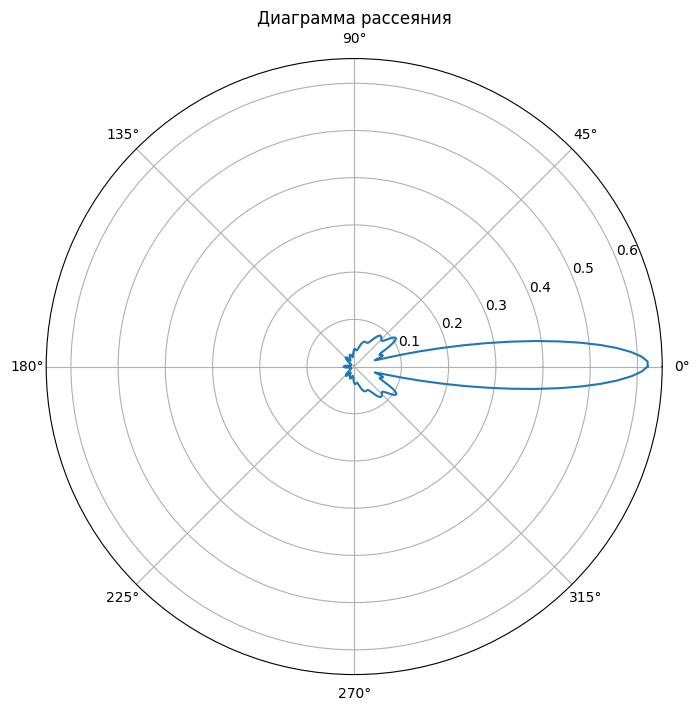

<module 'matplotlib.pyplot' from 'e:\\Archive\\MSU\\Магистратура\\Diplom\\Sphere difraction\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [88]:
r, eps, lmbd = FirstTest()
E, E_phi =  sd.calculate_electric_field_far(r, eps, lmbd )
plot_field_scaterring(E)

In [8]:
r, eps, lmbd = FirstTest()
limits = [-3 * r[-1], 5 * r[-1], -4 * r[-1], 4 * r[-1]]
vE_r, vE_theta, vE_phi = sd.calculate_electric_field_close_vectorized(r, eps, lmbd, limits)
E = abs(np.sqrt(vE_r**2 + vE_theta**2 + vE_phi**2))

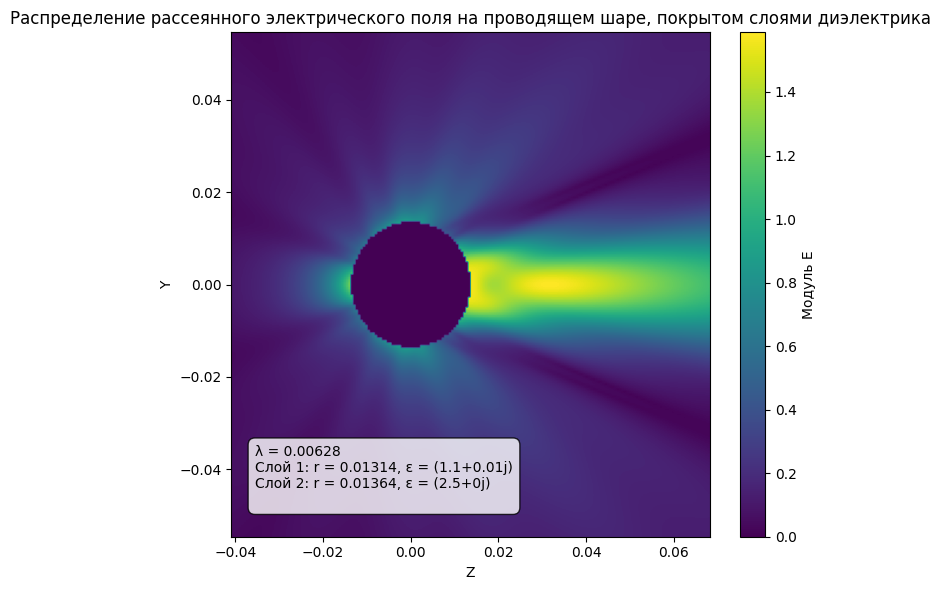

In [10]:
plot_field_distribution(E.T, limits, r, eps, lmbd)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets
from IPython.display import display

def plot_function(RE_eps1=1.0, IM_eps1=0.0, RE_eps2=2.5, IM_eps2=0.0, d1 = np.pi/1000, d2 = (np.pi + 0.5)/1000):
    r, eps, lmbd = FirstTest()
    eps[1] = complex(RE_eps1, IM_eps1)
    eps[2] = complex(RE_eps2, IM_eps2)

    #r[1] = r[0] + d1
    #r[2] = r[1] + d2


    limits = [-3 * r[-1], 5 * r[-1], -4 * r[-1], 4 * r[-1]]
    vE_r, vE_theta, vE_phi = sd.calculate_electric_field_close_vectorized(r, eps, lmbd, limits)
    E = abs(np.sqrt(vE_r**2 + vE_theta**2 + vE_phi**2))

    plot_field_distribution(E.T, limits, r, eps, lmbd)


slider_RE_eps1 = widgets.FloatSlider(value=1.0, min=0, max=5, step=0.1)
slider_IM_eps1 = widgets.FloatSlider(value=0.0, min=0, max=0.1, step=0.01)
slider_RE_eps2 = widgets.FloatSlider(value=2.5, min=0, max=5, step=0.1)
slider_IM_eps2 = widgets.FloatSlider(value=0.0, min=0, max=0.1, step=0.01)

slider_d1 = widgets.FloatLogSlider(value=0.01, min=0.0, max=0.01, step=0.001 )
slider_d2 = widgets.FloatLogSlider(value=0.01, min=0.0, max=0.01, step=0.001 )

label_EPS = widgets.HTML(value="<b>Layers permittivities</b>")
label_Ds = widgets.HTML(value="<b>Layers thickness</b>")

label_RE_EPS1 = widgets.HTML(value="<b>Re eps1</b>")
label_IM_EPS1 = widgets.HTML(value="<b>Im eps1</b>")
label_RE_EPS2 = widgets.HTML(value="<b>Re eps2</b>")
label_IM_EPS2 = widgets.HTML(value="<b>Im eps2</b>")

column1 = widgets.VBox([label_RE_EPS1, label_IM_EPS1, label_RE_EPS2, label_IM_EPS2])
column2 = widgets.VBox([slider_RE_eps1, slider_IM_eps1, slider_RE_eps2, slider_IM_eps2])
#column3 = widgets.VBox([label_Ds, slider_d1, slider_d2])


controls = widgets.HBox([column1, column2])#, column3])

# Display the layout
display(controls)

out = widgets.interactive_output(plot_function, {
    'RE_eps1': slider_RE_eps1,
    'IM_eps1': slider_IM_eps1,
    'RE_eps2': slider_RE_eps2,
    'IM_eps2': slider_IM_eps2,
    #'d1': slider_d1,
    #'d2': slider_d2,
})

display(out)


Output()

In [ ]:
from matplotlib.animation import FuncAnimation

# Modify this version of plot_function to return the image
def get_field_data(RE_eps1=1.0, IM_eps1=0.0, RE_eps2=2.5, IM_eps2=0.0):
    r, eps, lmbd = FirstTest()
    eps[1] = complex(RE_eps1, IM_eps1)
    eps[2] = complex(RE_eps2, IM_eps2)

    limits = [-3 * r[-1], 5 * r[-1], -4 * r[-1], 4 * r[-1]]
    vE_r, vE_theta, vE_phi = sd.calculate_electric_field_close_vectorized(r, eps, lmbd, limits)
    E = abs(np.sqrt(vE_r**2 + vE_theta**2 + vE_phi**2))
    return E.T, limits, r, eps, lmbd


RE_eps1_values = np.linspace(11,21,11)
RE_eps2_values = np.linspace(20,30,11)

RE_eps1_values /= 10.0
RE_eps2_values /= 10.0

params = [(e1, e2) for e1 in RE_eps1_values for e2 in RE_eps2_values]


images = []
for RE_eps1, RE_eps2 in params:
    E, limits, r, eps, lmbd = get_field_data(RE_eps1=RE_eps1, RE_eps2=RE_eps2)
    images.append(E)

In [ ]:
# Animation setup
fig, ax = plt.subplots()

im = ax.imshow(images[0], extent=limits, origin='lower', cmap='viridis')

#ax.colorbar(label='Модуль E')
ax.set_title("Распределение рассеянного электрического поля")
ax.set_xlabel('Z')
ax.set_ylabel('Y')


# info_text = f"λ = {lmbd:.5f}\n"
# for i, (radius, epsilon) in enumerate(zip(r, eps), start=1):
#     if i == 1:
#         continue
#     info_text += f"Слой {i-1}: r = {radius:.5f}, ε = {epsilon}\n"

# # Добавляем текст на график
# text = ax.text(0.05, 0.12, info_text, transform=plt.gca().transAxes,
#             fontsize=10, verticalalignment='center', bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8))

def update(i):
    im.set_data(images[i])
    # RE_eps1, RE_eps2 = params[i]
    # info_text = f"λ = {lmbd:.5f}\n"
    # for i, (radius, epsilon) in enumerate(zip(r, eps), start=1):
    #     if i == 1:
    #         continue
    #     info_text += f"Слой {i-1}: r = {radius:.5f}, ε = {epsilon}\n"

    # # Добавляем текст на график
    # text = ax.text(0.05, 0.12, info_text, transform=plt.gca().transAxes,
    #             fontsize=10, verticalalignment='center', bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8))
    return [im] #[im, text]

ani = FuncAnimation(fig, update, frames=len(images), blit=True, interval=300)

#plt.show()
ani.save("field_animation.gif")